# Extracting Text from Image

## *Import Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## *Dataset Observasion*

In [2]:
annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
train_imgs = glob('../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*')

### Plot Example Images

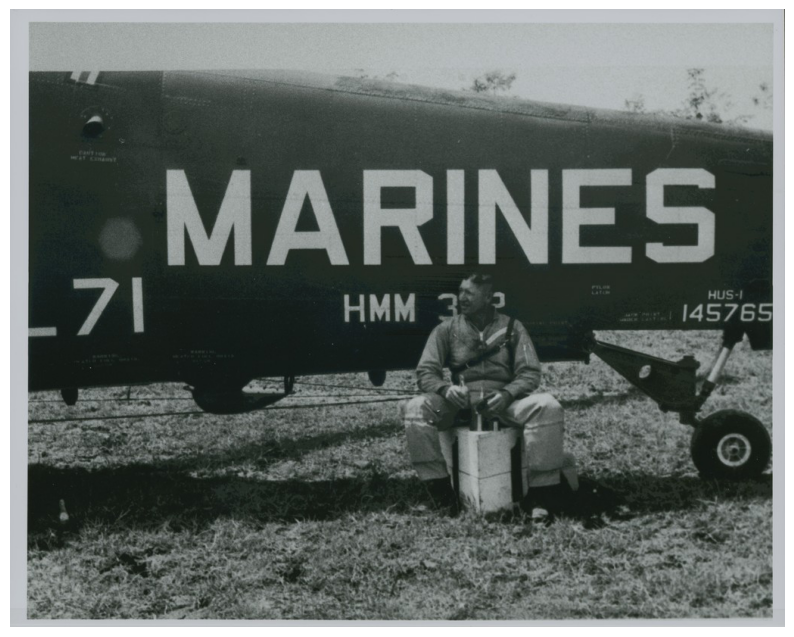

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(plt.imread(train_imgs[99]))
ax.axis('off')
plt.show()

In [4]:
# See text data in image
img_id = train_imgs[99].split('/')[-1].split('.')[0]